# Question 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.sparse.linalg import eigs

## Diffusion Map Algorithm

In [3]:
# parameters: data matrix X, scalar k
# returns: lamda, phi
def kernelnormalize(X, k):
    D = distance.cdist(X, X, 'euclidean') # Form a distance matrix D
    N = max(D.shape[0], D.shape[1])
    # initialize matrices
    P = np.zeros([N, N])
    Q = np.zeros([N, N])
    W = np.zeros([D.shape[0], D.shape[1]])
    epsilon = 0.05 * D.max() # the diameter of the dataset
    
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            kern = -((D[i][j])**2/epsilon) # kernel
            W[i][j] = np.exp(kern) # Form the kernel matrix
            
    # Form the diagonal normalization matrix
    s = np.sum(W, axis=1)
    for i in range(N):
        P[i][i] = s[i]
        
    # Normalize W to form the kernel matrix
    P_inv = np.linalg.inv(P)
    K = P_inv.dot(W).dot(P_inv)
    q = np.sum(K, axis=1)
    
    # Form the diagonal normalization matrix
    for i in range(N):
        Q[i][i] = q[i]
            
    # Form the symmetric matrix
    Q_inv = np.linalg.inv(Q)
    Q_sqrt = np.sqrt(Q_inv)
    T_hat = Q_sqrt.dot(K).dot(Q_sqrt)
    
    vals, vecs = eigs(T_hat, k, which='LR')
    
    eps_pow = 1/epsilon
    
    lamda_sq = np.power(vals, eps_pow)
    lamda = np.sqrt(lamda_sq)
    
    phi = Q_sqrt.dot(vecs)
        
    return lamda, phi

## Part One - Fourier

In [4]:
N = 1000
pi = np.pi
tk_matrix = np.zeros([1000, 1])
xk = np.zeros([1000, 2])
for k in range(N):
    tk = (2 * pi * k) / (N+1)
    tk_matrix[k] = tk
    xk[k][0] = np.cos(tk)
    xk[k][1] = np.sin(tk)

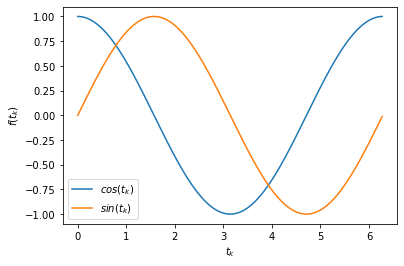

In [5]:
plt.plot(tk_matrix, xk[:,0])
plt.plot(tk_matrix, xk[:,1])
plt.legend(['$cos(t_k)$', '$sin(t_k)$'])
plt.ylabel('$f(t_k)$')
plt.xlabel('$t_k$')
plt.show()

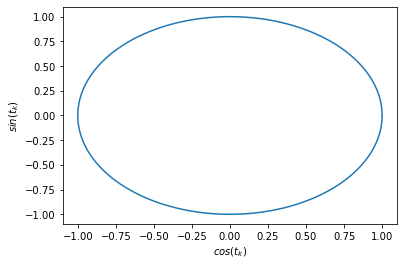

In [6]:
plt.plot(xk[:,0], xk[:,1])
plt.ylabel('$sin(t_k)$')
plt.xlabel('$cos(t_k)$')
plt.show()

In [7]:
lamda_f, phi_f = kernelnormalize(xk, 6)

In [8]:
phi_f.shape

(1000, 6)

In [9]:
lamda_f

array([1.        +0.j, 0.87965296+0.j, 0.87956515+0.j, 0.59850672+0.j,
       0.59919324+0.j, 0.31647998+0.j])

In [10]:
phi_f[0]

array([-0.29963425+0.j,  0.00269165+0.j,  0.42343157+0.j, -0.42310667+0.j,
       -0.00538575+0.j, -0.00806744+0.j])

C:\Users\Dilara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


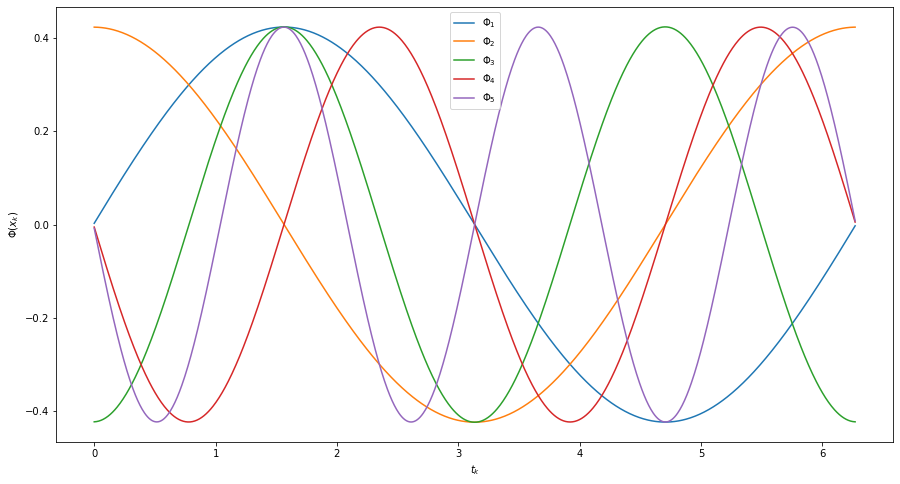

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(tk_matrix, phi_f[:, 1:6])
#plt.scatter(tk_matrix, phi_f[:,0])
plt.ylabel('$\u03A6(x_k)$')
plt.xlabel('$t_k$')
plt.legend(['$\u03A6_1$', '$\u03A6_2$', '$\u03A6_3$', '$\u03A6_4$', '$\u03A6_5$'])
plt.show()

C:\Users\Dilara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


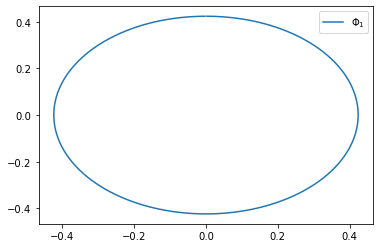

In [33]:
plt.plot(phi_f[:,1], phi_f[:, 2])
plt.legend(['$\u03A6_1$', '$\u03A6_2$', '$\u03A6_3$', '$\u03A6_4$', '$\u03A6_5$'])
plt.show()

## Part 2

In [12]:
from sklearn.datasets import make_swiss_roll

In [13]:
N = 5000
X = make_swiss_roll(n_samples = 5000)

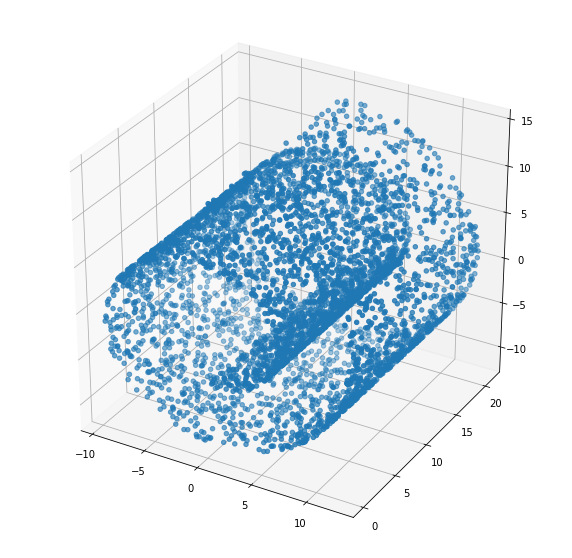

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0][:,0], X[0][:,1], X[0][:,2])
plt.show()

In [15]:
eigenvalues, eigenfunctions = kernelnormalize(X[0], 10)

KeyboardInterrupt: 

In [ ]:
for i in range(1,10):
    plt.plot(eigenfunctions[:,0], eigenfunctions[:,i])
    plt.show()

## Bonus

In [16]:
import numpy as np
import copy

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

from sklearn.datasets import make_swiss_roll, make_s_curve
from sklearn.decomposition import PCA
import sklearn.manifold as manifold

# NOTE: make sure "path/to/datafold" is in sys.path or PYTHONPATH if datafold is not installed
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.utils.plot import plot_pairwise_eigenvector
from datafold.dynfold import LocalRegressionSelection

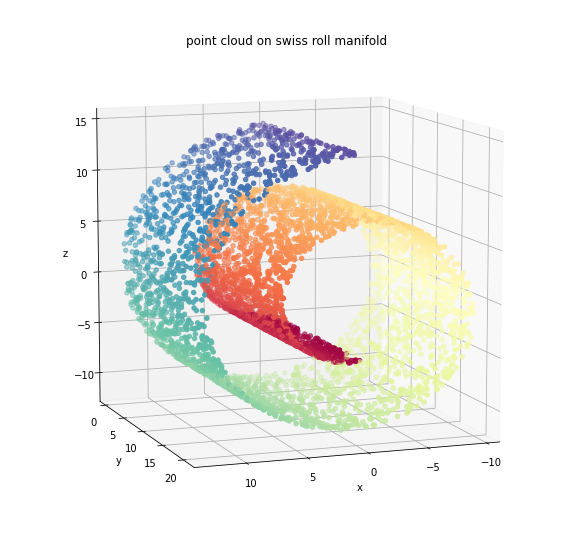

In [17]:
nr_samples = 5000

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot= np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[idx_plot, 0], X[idx_plot, 1], X[idx_plot, 2], c=X_color[idx_plot], cmap=plt.cm.Spectral)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.set_title("point cloud on swiss roll manifold");
ax.view_init(10,70)

In [18]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters(result_scaling=0.5)

print(f'epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}')

epsilon=0.22124219702364525, cut-off=2.018769892400612


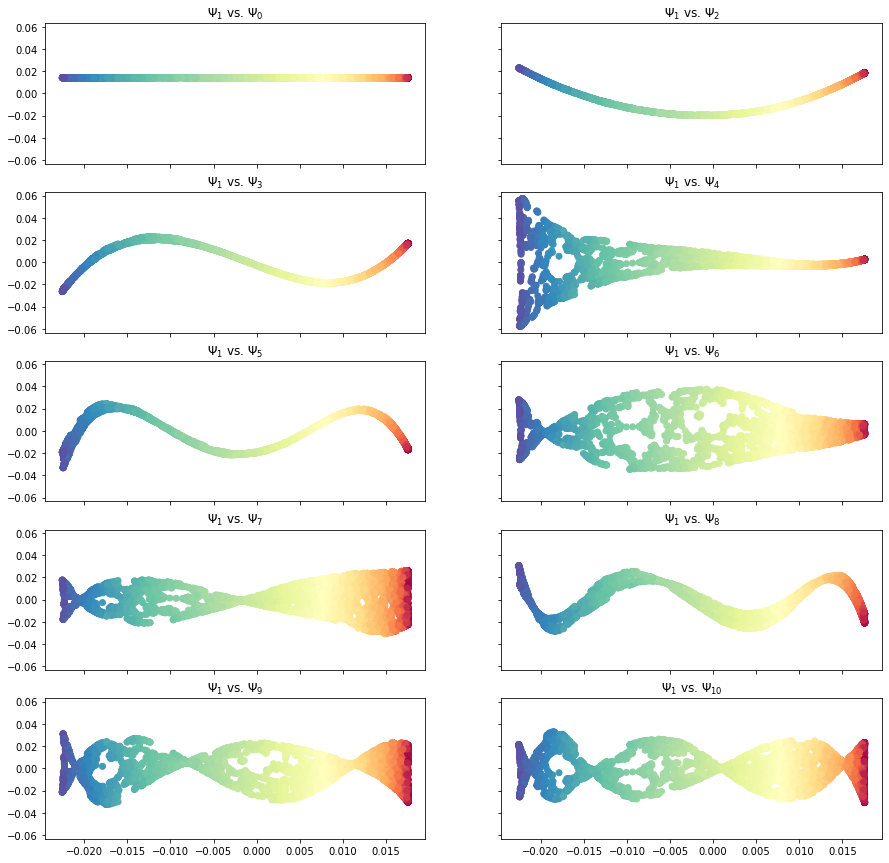

In [19]:
dmap = dfold.DiffusionMaps(kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon), n_eigenpairs=11, dist_kwargs=dict(cut_off=X_pcm.cut_off))
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(eigenvectors=dmap.eigenvectors_[idx_plot, :], n=1,
                          fig_params=dict(figsize=[15,15]),
                          scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]))

In [20]:
selection = LocalRegressionSelection(intrinsic_dim=2, n_subsample=500, strategy="dim").fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 4]


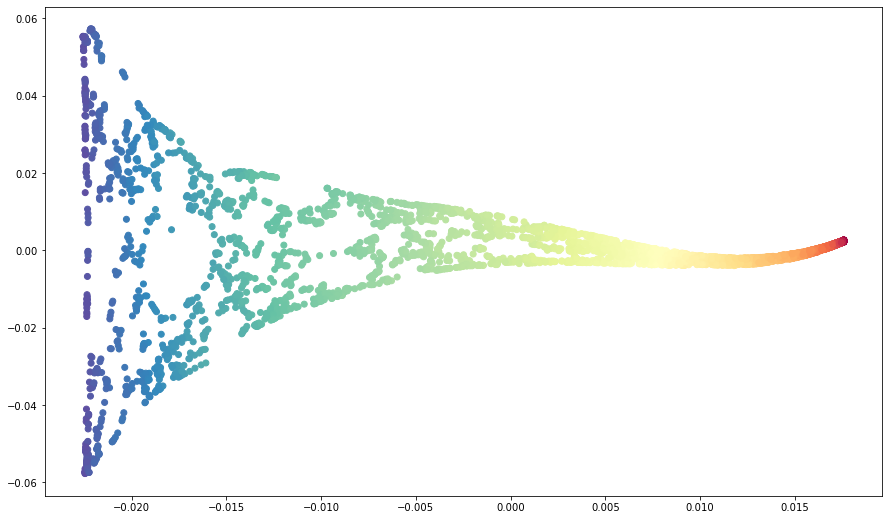

In [21]:
parsimoneous_dmap = copy.deepcopy(dmap)
parsimoneous_dmap = parsimoneous_dmap.set_coords(selection.evec_indices_)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(parsimoneous_dmap.eigenvectors_[idx_plot, 0],
           parsimoneous_dmap.eigenvectors_[idx_plot, 1],
           c=X_color[idx_plot],
           cmap=plt.cm.Spectral);

## Part 3

In [22]:
X_vadere = pd.read_csv("data_DMAP_PCA_vadere.txt", sep=" ", header=None)

In [23]:
X_vadere = X_vadere - X_vadere.mean()

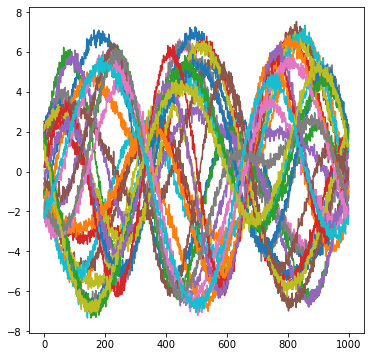

In [24]:
plt.figure(figsize=(6, 6))
plt.plot(X_vadere)
plt.show()

In [25]:
lamda_v, phi_v = kernelnormalize(X_vadere, 9)

In [26]:
phi_v.shape

(1000, 9)

In [27]:
lamda_v

array([1.        +0.j, 0.99993104+0.j, 0.99992943+0.j, 0.99972196+0.j,
       0.99971979+0.j, 0.9993588 +0.j, 0.99938493+0.j, 0.99887324+0.j,
       0.99889581+0.j])

C:\Users\Dilara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dilara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dilara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dilara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Dilara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_

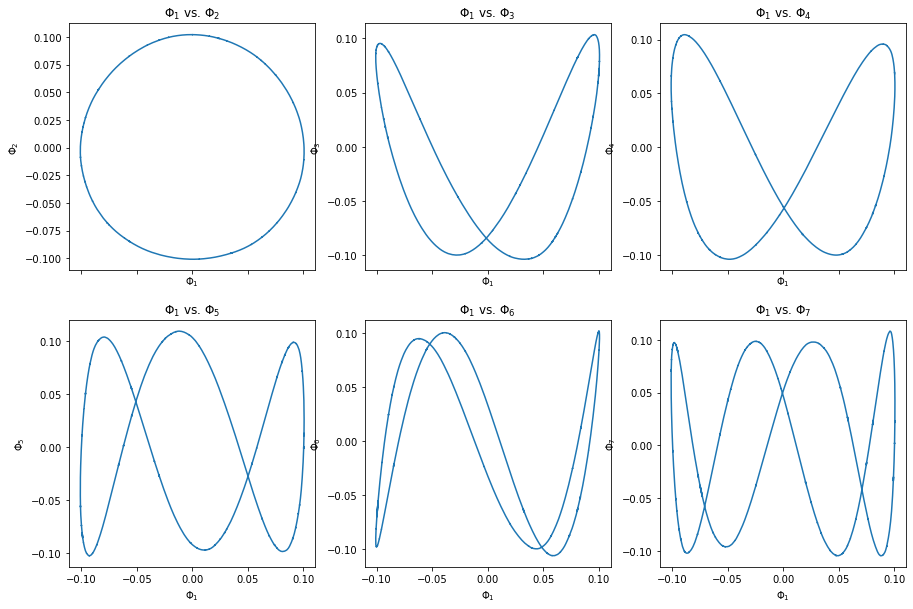

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(15,10), sharex=True)
j=0
k=0
for i in range(2,8):
    ax[j, k].plot(phi_v[:,1], phi_v[:,i])
    ax[j, k].set_xlabel('$\u03A6_1$')
    ax[j, k].set_ylabel('$\u03A6_'+ str(i) +'$')
    ax[j, k].set_title('$\u03A6_1$ vs. $\u03A6_'+ str(i) +'$')
    k = k+1
    if(k==3):
        k=0
        j=j+1
    
plt.show()